In [8]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

Mounted at /content/gdrive


In [2]:
path = '/content/gdrive/MyDrive/HateSpeechACM/englishdataset.csv'

In [3]:
print(path)

/content/gdrive/MyDrive/HateSpeechACM/englishdataset.csv


In [4]:
import pandas as pd
url='/content/gdrive/MyDrive/HateSpeechACM/englishdataset.csv'

In [5]:
import os, shutil
import pandas as pd
dataset=pd.read_csv(url)
dataset

FileNotFoundError: ignored

In [ ]:
dataset.dropna(subset = ["tweet"], inplace=True)

In [ ]:
dataset["class"].describe()

count     1153
unique       2
top        NOT
freq       865
Name: class, dtype: object

In [ ]:
pd.unique(dataset["class"])

array(['NOT', 'HOF'], dtype=object)

In [ ]:
dataset["class"].describe()

count     1153
unique       2
top        NOT
freq       865
Name: class, dtype: object

In [ ]:
# Adding text-length as a field in the dataset
dataset['text length'] = dataset['tweet'].apply(len)
print(dataset.head())

                                               tweet class  text length
0  West Bengal Doctor Crisis: Protesting doctors ...   NOT          128
1  68.5 million people have been forced to leave ...   NOT          117
2  You came, you saw .... we will look after the ...   NOT           62
3  We'll get Brexit delivered by October 31st.   ...   NOT          146
4  Fuck you. Go back to the dark ages you cow @IB...   HOF          119


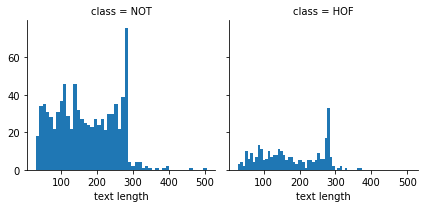

In [ ]:
#Basic visualization of data using histograms
# FacetGrid- Multi-plot grid for plotting conditional relationships
import seaborn as sns
import matplotlib.pyplot as plt
graph = sns.FacetGrid(data=dataset, col='class')
graph.map(plt.hist, 'text length', bins=50)

In [ ]:
tweet=dataset.tweet

In [ ]:
# remove special characters, numbers, punctuations
dataset['tweet'] = dataset['tweet'].str.replace("[^a-zA-Z#]", " ")

In [ ]:
dataset['tweet']

0       West Bengal Doctor Crisis  Protesting doctors ...
1            million people have been forced to leave ...
2       You came  you saw      we will look after the ...
3       We ll get Brexit delivered by October   st    ...
4       Fuck you  Go back to the dark ages you cow  IB...
                              ...                        
1148    Each of the divorce must be pronounced with a ...
1149    He is    yr old Harswaroop Chauhan  His only s...
1150    Peace of graveyard or peace of mind   asadowai...
1151    The humble #tribute on the sacrifice day of #J...
1152    Happy Birthday to Sh  nitin gadkari Ji  God bl...
Name: tweet, Length: 1153, dtype: object

In [ ]:
#Removing Short Words
dataset['tweet'] = dataset['tweet'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>3]))

In [ ]:
#Tokenization
tokenized_tweet = dataset['tweet'].apply(lambda x: x.split())
tokenized_tweet.head()

0    [West, Bengal, Doctor, Crisis, Protesting, doc...
1    [million, people, have, been, forced, leave, t...
2          [came, will, look, after, fort, Good, luck]
3    [Brexit, delivered, October, Help, build, move...
4    [Fuck, back, dark, ages, IBNLiveRealtime, Rape...
Name: tweet, dtype: object

In [ ]:
#Stemming
from nltk.stem.porter import *
stemmer = PorterStemmer()

tokenized_tweet = tokenized_tweet.apply(lambda x: [stemmer.stem(i) for i in x]) # stemming
tokenized_tweet.head()

0    [west, bengal, doctor, crisi, protest, doctor,...
1    [million, peopl, have, been, forc, leav, their...
2          [came, will, look, after, fort, good, luck]
3    [brexit, deliv, octob, help, build, movement, ...
4    [fuck, back, dark, age, ibnliverealtim, rape, ...
Name: tweet, dtype: object

In [ ]:
dataset["class"]=dataset["class"].replace(to_replace =['NOT'], value =0)
dataset["class"]=dataset["class"].replace(to_replace =['HOF'], value =1)



In [ ]:
dataset['class']

0       0
1       0
2       0
3       0
4       1
       ..
1148    0
1149    0
1150    0
1151    0
1152    0
Name: class, Length: 1153, dtype: int64

In [ ]:
X=dataset['tweet']
y=dataset['class']

In [ ]:
import sklearn.model_selection as model_selection
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, train_size=0.65,test_size=0.35, random_state=101)
print ("X_train: ", X_train)
print ("y_train: ", y_train)
print("X_test: ", X_test)
print ("y_test: ", y_test)

X_train:  361                  back England miserable excuse human
134    absolutely right that government does support ...
621    Stop lying genuinely attach huge importance Go...
155    akashbanerjee video which lists points underst...
737    friend sends text asking does risk losing inst...
                             ...                        
575    VtvGujarati isudan gadhvi golanihemant patelke...
973    Under Islamic divorce pronounced twice which o...
75     Basically Mamata just tags protest against wha...
599    This zomato these people give gyaan twitter ab...
863    What happened Delhi happened Parliament Happen...
Name: tweet, Length: 749, dtype: object
y_train:  361    1
134    0
621    0
155    0
737    0
      ..
575    0
973    0
75     1
599    0
863    0
Name: class, Length: 749, dtype: int64
X_test:  686     Boris Johnson faces Supreme Court make stand t...
821     century realDonaldTrump congratulate Twitter w...
407     Scottish Conservative leader RuthDavidsonM

Fasttext

In [ ]:
from gensim.models import FastText

In [ ]:

print("Training a Gensim FastText model")
model = FastText(sentences=tokenized_tweet, size = 200, window = 2) # workers = workers, 
print("Training complete")

Training a Gensim FastText model
Training complete


In [ ]:
model

In [ ]:
 model.most_similar(positive="violence")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.


[('violenc', 0.9991224408149719),
 ('violent', 0.998301088809967),
 ('cricket', 0.9980921149253845),
 ('#tripletalaq', 0.9980901479721069),
 ('instant', 0.9980819225311279),
 ('same', 0.9980736970901489),
 ('come', 0.998069167137146),
 ('#tripletalaqtruth', 0.9980635643005371),
 ('wouldn', 0.9980567693710327),
 ('break', 0.9980558753013611)]

In [ ]:
def word_vector(tokens, size):
     vec = np.zeros(size).reshape((1, size))
     count = 0.
     for word in tokens:
         try:
             vec += model[word].reshape((1, size))
             count += 1.
         except KeyError: # handling the case where the token is not in vocabulary
                        
             continue
     if count != 0:
         vec /= count
     return vec

In [ ]:
model.most_similar(positive="hate")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.


[('them', 0.9998879432678223),
 ('their', 0.9998869895935059),
 ('that', 0.9998803734779358),
 ('there', 0.9998785853385925),
 ('they', 0.9998767971992493),
 ('these', 0.9998754262924194),
 ('thi', 0.9998748302459717),
 ('then', 0.9998742341995239),
 ('india', 0.9998741149902344),
 ('state', 0.9998732805252075)]

In [ ]:
model['violence']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """Entry point for launching an IPython kernel.


array([ 0.01394737, -0.02017253,  0.00708241, -0.00519892,  0.01045253,
       -0.00212145, -0.02321891, -0.00374098, -0.01381655,  0.01768276,
       -0.03570081, -0.00273025,  0.00962313, -0.0414643 ,  0.01193833,
        0.0121599 , -0.01792444, -0.00129876,  0.0190659 ,  0.02227197,
       -0.00702816,  0.00358107,  0.02813074, -0.00269868,  0.00495798,
       -0.0046413 , -0.02974348,  0.00094767,  0.03298869, -0.00216247,
       -0.00350348, -0.01472243,  0.00140327,  0.02555923,  0.01295226,
       -0.00981752, -0.00471557, -0.01077412, -0.00685683,  0.01819493,
       -0.03307827, -0.01464627, -0.02082243,  0.0062248 ,  0.02107238,
        0.00617152, -0.00834599,  0.00717395,  0.00671348,  0.02110045,
       -0.01148926, -0.00541689, -0.02898843,  0.00796483,  0.00584706,
       -0.02231819, -0.00693626,  0.00395758, -0.00164627, -0.0273523 ,
        0.00166833,  0.00645697,  0.00369149, -0.00883837,  0.01025361,
        0.00787974, -0.02162786, -0.02180847, -0.01656111,  0.01

In [ ]:
semantically_similar_words = {words: [item[0] for item in model.most_similar([words], topn=5)]
                  for words in ['hate', 'reservation','pakistan','hindu', 'muslim']}

for k,v in semantically_similar_words.items():
    print(k+":"+str(v))

hate:['them', 'their', 'that', 'there', 'they']
reservation:['reserv', 'nation', 'with', 'that', 'india']
pakistan:['#pakistan', 'that', 'thi', 'they', 'stand']
hindu:['thing', 'indian', 'where', 'there', 'them']
muslim:['that', 'there', 'them', 'then', 'these']


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  


In [ ]:
import numpy as np
fasttext_arrays = np.zeros((len(tokenized_tweet), 200))

for i in range(len(tokenized_tweet)):
    fasttext_arrays[i,:] = word_vector(tokenized_tweet[i], 200)
    
fasttext_df = pd.DataFrame(fasttext_arrays)
fasttext_df.shape

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  


(1153, 200)

In [ ]:
dataset

,tweet,class,text length
0,West Bengal Doctor Crisis Protesting doctors a...,0,128
1,million people have been forced leave their ho...,0,117
2,came will look after fort Good luck,0,62
3,Brexit delivered October Help build movement t...,0,146
4,Fuck back dark ages IBNLiveRealtime Rapes happ...,1,119
...,...,...,...
1148,Each divorce must pronounced with stipulated i...,0,118
1149,Harswaroop Chauhan only sibling Gangaram been ...,0,278
1150,Peace graveyard peace mind asadowaisi asks Ami...,0,63
1151,humble #tribute sacrifice #JhansiKiRani #Laxmi...,0,208


In [ ]:
#def wv2centroid(fasttext_df):
#   return np.mean(fasttext_df, axis=0)

In [ ]:
#fasttext_df['mean'] = fasttext_df.mean(axis=1)


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score

from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import plot_confusion_matrix, accuracy_score
train_ft = fasttext_df.iloc[:1153,:]
test_ft = fasttext_df.iloc[1153:,:] 
xtrain_ft, xvalid_ft, ytrain, yvalid = train_test_split(train_ft, dataset['class'], random_state=42, test_size=0.2)

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import model_selection, naive_bayes, svm
from sklearn.metrics import accuracy_score
svc = svm.SVC(kernel='rbf', C=1, probability=True).fit(xtrain_ft, ytrain) 
prediction = svc.predict_proba(xvalid_ft) 
prediction_int1 = prediction[:,1] >= 0.2 
prediction_int1 = prediction_int1.astype(np.int) 
f1_score(yvalid, prediction_int1)

0.3417085427135678

In [ ]:
report1 = classification_report( yvalid, prediction_int1 )
print(report1)
acc1=accuracy_score(yvalid,prediction_int1)

print("SVM-RBF(fasttext), Accuracy Score:",acc1)

              precision    recall  f1-score   support

           0       0.73      0.38      0.50       172
           1       0.24      0.58      0.34        59

    accuracy                           0.43       231
   macro avg       0.48      0.48      0.42       231
weighted avg       0.60      0.43      0.46       231

SVM-RBF(fasttext), Accuracy Score: 0.4329004329004329


In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=400, random_state=11).fit(xtrain_ft, ytrain) 
prediction2 = rf.predict(xvalid_ft)
f1_score(yvalid, prediction2)

0.17142857142857146

In [ ]:
report2 = classification_report( yvalid, prediction2 )
print(report2)
acc2=accuracy_score(yvalid,prediction2)

print("RF(fasttext), Accuracy Score:",acc2)

              precision    recall  f1-score   support

           0       0.76      0.97      0.85       172
           1       0.55      0.10      0.17        59

    accuracy                           0.75       231
   macro avg       0.65      0.54      0.51       231
weighted avg       0.70      0.75      0.68       231

RF(fasttext), Accuracy Score: 0.7489177489177489


In [ ]:
from keras.layers import Dense, Embedding, LSTM, SpatialDropout1D
from keras.models import Sequential
model = Sequential()
model.add(Embedding(500, 120, input_length = xtrain_ft.shape[1]))
model.add(SpatialDropout1D(0.4))
model.add(LSTM(176, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(1,activation='softmax'))
model.compile(loss = 'categorical_crossentropy', optimizer='adam', metrics = ['accuracy'])
print(model.summary())

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, 200, 120)          60000     
_________________________________________________________________
spatial_dropout1d_3 (Spatial (None, 200, 120)          0         
_________________________________________________________________
lstm_3 (LSTM)                (None, 176)               209088    
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 177       
Total params: 269,265
Trainable params: 269,265
Non-trainable params: 0
_________________________________________________________________
None


In [ ]:
batch_size=32
model.fit(xtrain_ft, ytrain, epochs = 5, batch_size=batch_size, verbose = 'auto')

Epoch 1/5
29/29 [==============================] - 31s 872ms/step - loss: 0.0000e+00 - accuracy: 0.2690
Epoch 2/5
29/29 [==============================] - 25s 870ms/step - loss: 0.0000e+00 - accuracy: 0.2501
Epoch 3/5
29/29 [==============================] - 25s 876ms/step - loss: 0.0000e+00 - accuracy: 0.2380
Epoch 4/5
29/29 [==============================] - 25s 871ms/step - loss: 0.0000e+00 - accuracy: 0.2693
Epoch 5/5
29/29 [==============================] - 26s 883ms/step - loss: 0.0000e+00 - accuracy: 0.2482


In [ ]:
from __future__ import division
import os
import numpy 
import pickle
from sklearn import svm
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier 
from sklearn.model_selection import train_test_split  # Random split into training and test dataset.
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
#from sklearn.model_selection import cross_validate
from sklearn import metrics
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.feature_selection import RFE
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder, MultiLabelBinarizer



In [ ]:
gnb = GaussianNB()
gnb.fit(xtrain_ft, ytrain)

#Predict the response for test dataset
y_pred3 = gnb.predict(xvalid_ft)


In [ ]:
print("Accuracy:",metrics.accuracy_score(yvalid, y_pred3))

Accuracy: 0.5454545454545454


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)

#Train the model using the training sets
knn.fit(xtrain_ft, ytrain)

#Predict the response for test dataset
y_pred4 = knn.predict(xvalid_ft)

In [ ]:
print("Accuracy:",metrics.accuracy_score(yvalid, y_pred4))

Accuracy: 0.6363636363636364


Hyper Parameter Tuning

In [ ]:
svc = svm.SVC()

# Create the random grid
random_grid = {'C': [1,10,100], 
              'kernel': ['linear','rbf']}
              
rf_random = RandomizedSearchCV(estimator = svc, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(xtrain_ft, ytrain)
print(rf_random.best_params_)
prediction0 = rf_random.predict(xvalid_ft) 

#classifiction Report

report = classification_report( yvalid, prediction0)
print(report)
acc0=accuracy_score(yvalid,prediction0)

print("SVM(fasttext) after HT+RS, Accuracy Score:",acc0)

Fitting 3 folds for each of 6 candidates, totalling 18 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 out of  18 | elapsed:    3.5s finished


{'kernel': 'linear', 'C': 1}
              precision    recall  f1-score   support

           0       0.74      1.00      0.85       172
           1       0.00      0.00      0.00        59

    accuracy                           0.74       231
   macro avg       0.37      0.50      0.43       231
weighted avg       0.55      0.74      0.64       231

SVM(bow) after HT+RS, Accuracy Score: 0.7445887445887446


In [ ]:
#fasttext_df.size

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from keras.models import Sequential
from keras.layers import Dense, BatchNormalization, Dropout
from keras.optimizers import Adam, SGD, RMSprop, Adadelta, Adagrad, Adamax, Nadam, Ftrl
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.wrappers.scikit_learn import KerasClassifier
from math import floor
from sklearn.metrics import make_scorer, accuracy_score
from hyperopt import hp, tpe, fmin
from sklearn.model_selection import StratifiedKFold
from keras.layers import LeakyReLU
LeakyReLU = LeakyReLU(alpha=0.1)
import warnings
warnings.filterwarnings('ignore')
pd.set_option("display.max_columns", None)
# Make scorer accuracy
score_acc = make_scorer(accuracy_score)

In [ ]:
from sklearn.model_selection import GridSearchCV
parameters = [{'C': [1,10,100], 'kernel': ['linear','rbf']}]
grid_search = GridSearchCV(estimator= svc,
                          param_grid = parameters, scoring = 'accuracy',cv = 10)
grid_search = grid_search.fit(xtrain_ft, ytrain)
print(grid_search.best_params_)
prediction = grid_search.predict(xvalid_ft)  

#classifiction Report

report = classification_report( yvalid, prediction)
print(report)
acc5=accuracy_score(yvalid,prediction)

print("SVM(fasttext) after HT+GD, Accuracy Score:",acc5)

{'C': 1, 'kernel': 'linear'}
              precision    recall  f1-score   support

           0       0.74      1.00      0.85       172
           1       0.00      0.00      0.00        59

    accuracy                           0.74       231
   macro avg       0.37      0.50      0.43       231
weighted avg       0.55      0.74      0.64       231

SVM(word2vec) after HT+GD, Accuracy Score: 0.7445887445887446


In [ ]:
#svr_random.best_params_, svr_random.best_score_

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=400, random_state=11).fit(xtrain_ft, ytrain) 
prediction = rf.predict(xvalid_ft)


#classifiction Report

report = classification_report( yvalid, prediction )
print(report)
acc6=accuracy_score(yvalid,prediction)

print("RF, Accuracy Score:",acc6)

              precision    recall  f1-score   support

           0       0.76      0.97      0.85       172
           1       0.55      0.10      0.17        59

    accuracy                           0.75       231
   macro avg       0.65      0.54      0.51       231
weighted avg       0.70      0.75      0.68       231

RF(word2vec), Accuracy Score: 0.7489177489177489


In [ ]:
from sklearn.model_selection import RandomizedSearchCV
rf = RandomForestClassifier()
#Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 500, stop = 1000, num = 100)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 50, num = 10)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(xtrain_ft, ytrain)

print("best Params")
print(rf_random.best_params_)

prediction = rf_random.predict(xvalid_ft)

#classifiction Report
report = classification_report( yvalid, prediction )
print(report)
acc7=accuracy_score(yvalid,prediction)

print("RF(word2vec) after HT+RS, Accuracy Score:",acc7)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:  2.1min
[Parallel(n_jobs=-1)]: Done 158 tasks      | elapsed:  8.4min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed: 16.1min finished


best Params
{'n_estimators': 803, 'min_samples_split': 10, 'min_samples_leaf': 4, 'max_features': 'auto', 'max_depth': 10, 'bootstrap': True}
              precision    recall  f1-score   support

           0       0.75      0.99      0.85       172
           1       0.50      0.03      0.06        59

    accuracy                           0.74       231
   macro avg       0.62      0.51      0.46       231
weighted avg       0.69      0.74      0.65       231

RF(word2vec) after HT+RS, Accuracy Score: 0.7445887445887446


In [ ]:
from sklearn.model_selection import GridSearchCV
# Create the parameter grid 
param_grid = {
    'bootstrap': [True],
    'max_depth': [80, 90, 100, 110],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 200, 300, 1000]
}
# Create a based model
rf = RandomForestClassifier()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid,cv = 3, n_jobs = -1, verbose = 2)
# Fit the grid search to the data
grid_search.fit(xtrain_ft, ytrain)

print("best Params")
print(grid_search.best_params_)

prediction8 = grid_search.predict(xvalid_ft)

#classifiction Report

report = classification_report( yvalid, prediction )
print(report)
acc8=accuracy_score(yvalid,prediction)

print("RF(fasttext) after HT+GS, Accuracy Score:",acc8)

Fitting 3 folds for each of 288 candidates, totalling 864 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:   25.5s
[Parallel(n_jobs=-1)]: Done 158 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done 361 tasks      | elapsed:  4.3min
[Parallel(n_jobs=-1)]: Done 644 tasks      | elapsed:  7.8min
[Parallel(n_jobs=-1)]: Done 864 out of 864 | elapsed: 10.5min finished


best Params
{'bootstrap': True, 'max_depth': 90, 'max_features': 2, 'min_samples_leaf': 3, 'min_samples_split': 12, 'n_estimators': 100}
              precision    recall  f1-score   support

           0       0.75      0.99      0.85       172
           1       0.50      0.03      0.06        59

    accuracy                           0.74       231
   macro avg       0.62      0.51      0.46       231
weighted avg       0.69      0.74      0.65       231

RF(word2vec) after HT+GS, Accuracy Score: 0.7445887445887446


Doc2Vec

In [ ]:
from tqdm import tqdm 
tqdm.pandas(desc="progress-bar") 
from gensim.models.doc2vec import LabeledSentence

In [ ]:
def add_label(twt):
    output = []
    for i, s in zip(twt.index, twt):
        output.append(LabeledSentence(s, ["tweet_" + str(i)]))
    return output

labeled_tweets = add_label(tokenized_tweet) # label all the tweets

In [ ]:
import gensim
model_d2v = gensim.models.Doc2Vec(dm=1, # dm = 1 for ‘distributed memory’ model
                                  dm_mean=1, # dm_mean = 1 for using mean of the context word vectors
                                  vector_size=200, # no. of desired features
                                  window=5, # width of the context window                                  
                                  negative=7, # if > 0 then negative sampling will be used
                                  min_count=5, # Ignores all words with total frequency lower than 5.                                  
                                  workers=32, # no. of cores                                  
                                  alpha=0.1, # learning rate                                  
                                  seed = 23, # for reproducibility
                                 ) 

model_d2v.build_vocab([i for i in tqdm(labeled_tweets)])

model_d2v.train(labeled_tweets, total_examples= len(dataset['tweet']), epochs=15)

100%|██████████| 1153/1153 [00:00<00:00, 1105884.41it/s]


In [ ]:
docvec_arrays = np.zeros((len(tokenized_tweet), 200)) 
for i in range(len(dataset)):
    docvec_arrays[i,:] = model_d2v.docvecs[i].reshape((1,200))    

docvec_df = pd.DataFrame(docvec_arrays) 
docvec_df.shape

(1153, 200)

In [ ]:
docvec_df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199
0,0.055312,-0.039930,0.191448,-0.149319,0.110794,-0.138439,0.051423,-0.003943,-0.007598,-0.065237,0.019513,-0.102994,-0.031106,0.056399,0.085243,-0.045452,-0.049448,-0.090799,0.057514,0.027814,0.194963,-0.144012,0.232128,0.004772,-0.113581,0.028224,-0.103949,0.111155,0.073251,0.021104,-0.152625,0.039723,0.033198,-0.007666,0.077760,-0.008866,-0.102105,-0.035564,0.014161,0.097684,-0.174950,0.006351,0.067718,-0.144566,0.244559,-0.055779,0.055129,-0.174438,0.053647,0.138934,0.128230,-0.037576,-0.095177,0.096715,-0.029224,-0.147459,-0.039733,-0.081511,0.097535,-0.127752,-0.223355,0.064697,-0.067259,0.072545,0.061619,-0.150009,0.152331,-0.194776,-0.020112,-0.021461,0.087508,0.003023,-0.113706,-0.124695,-0.028077,0.069431,-0.201233,-0.066189,0.035115,0.140000,-0.047706,0.146456,-0.048373,-0.056729,0.041842,0.074862,-0.058753,-0.059540,-0.070898,-0.061751,-0.051123,-0.182045,-0.160678,-0.065777,0.074163,-0.073466,-0.267037,-0.158344,0.044062,0.051425,-0.077031,0.114817,-0.182484,-0.070219,0.006282,0.098775,-0.144713,-0.040478,-0.011775,-0.024338,-0.004593,-0.090838,-0.007223,0.002444,-0.090104,0.087139,0.028637,0.114386,-0.059107,0.314040,0.036433,-0.207628,0.121528,0.168863,-0.030016,-0.089476,-0.056296,-0.229768,0.038695,0.229738,0.060928,0.029991,0.077916,0.095506,-0.088583,0.146278,-0.135664,0.075616,-0.050393,0.051478,-0.004462,-0.191311,-0.031969,-0.002654,-0.121763,-0.110812,0.090307,-0.082125,-0.254773,-0.064707,-0.022161,-0.154172,-0.137295,-0.059365,0.067794,-0.069797,-0.033828,-0.001323,0.008541,0.094177,-0.028051,-0.015630,-0.009411,0.041273,0.160046,-0.120427,0.027131,-0.032987,-0.096873,-0.113636,-0.062230,-0.015315,0.050063,0.215760,0.024331,0.083756,0.120729,0.155200,0.004358,0.013040,-0.203371,0.086246,0.128653,0.075776,-0.005553,-0.010128,-0.016698,-0.009678,-0.069997,0.136486,0.026843,-0.032314,0.014119,-0.067477,-0.133395,-0.078424,0.032957,0.046098,0.003512,-0.021471
1,-0.061018,0.016988,0.049502,-0.042556,0.012166,0.042974,0.143421,-0.050513,-0.014999,-0.021124,-0.103508,-0.014746,-0.062674,0.039278,-0.023490,-0.005170,-0.032101,-0.067672,-0.047502,0.086716,0.029468,-0.049504,0.094705,0.053743,-0.040958,-0.005397,-0.128751,0.031853,0.037736,0.099800,-0.058445,-0.102526,0.049032,-0.041298,0.129646,0.103363,-0.021137,-0.025913,0.037137,-0.038500,-0.128343,-0.006980,0.078419,0.011923,0.009650,-0.093427,0.108384,0.033260,0.045413,-0.094165,-0.043469,-0.053775,0.057963,0.072712,0.043468,-0.044517,0.075127,-0.026359,0.006359,0.043224,-0.153530,0.080685,-0.070069,0.052864,0.091646,-0.095059,-0.055839,-0.043282,-0.063824,0.066563,0.056411,-0.015844,-0.008193,-0.215822,0.040523,-0.049753,-0.111441,-0.091611,-0.029417,0.086315,0.032174,-0.005204,0.040144,-0.071306,-0.071806,-0.002281,0.022584,0.052517,0.117852,-0.008148,-0.030722,-0.027184,-0.027622,0.034868,0.004980,-0.042590,-0.114096,0.058591,0.055083,-0.052130,-0.016828,-0.018380,-0.044166,-0.114783,0.082226,0.158211,-0.062394,0.001910,-0.037969,-0.100493,-0.035638,-0.011532,0.055595,0.023990,0.119399,-0.001851,0.071994,-0.086471,0.092134,-0.022091,-0.041771,-0.097996,-0.017188,0.001062,0.062520,-0.069970,-0.066527,-0.044718,0.074902,-0.002593,0.096486,-0.111685,-0.041615,0.026480,-0.017918,0.017210,-0.164579,0.100271,-0.208402,0.032018,0.023155,0.037884,-0.026814,0.044153,-0.153497,-0.02179

In [ ]:
train_d2v = docvec_df.iloc[:1153,:]
test_d2v = docvec_df.iloc[1153:,:] 

# splitting data into training and validation set 
xtrain_d2v, xvalid_d2v, ytrain, yvalid = train_test_split(train_d2v, dataset['class'], random_state=42, test_size=0.2)

In [ ]:
svc = svm.SVC(kernel='rbf', C=1).fit(xtrain_d2v, ytrain) 
prediction = svc.predict(xvalid_d2v) 

#classifiction Report

report = classification_report( yvalid, prediction )
print(report)
acc1=accuracy_score(yvalid,prediction)

print("SVM-RBF(doc2vec), Accuracy Score:",acc1)

              precision    recall  f1-score   support

           0       0.79      0.99      0.88       172
           1       0.93      0.22      0.36        59

    accuracy                           0.80       231
   macro avg       0.86      0.61      0.62       231
weighted avg       0.82      0.80      0.75       231

SVM-RBF(doc2vec), Accuracy Score: 0.7965367965367965


In [ ]:
parameters = [{'C': [1,10,50,100], 'kernel': ['linear','rbf']}]
grid_search = GridSearchCV(estimator= svc,
                          param_grid = parameters, scoring = 'accuracy',cv = 10)
grid_search = grid_search.fit(xtrain_d2v, ytrain)
grid_search.best_params_
prediction = grid_search.predict(xvalid_d2v) 

#classifiction Report

report = classification_report( yvalid, prediction)
print(report)
acc1=accuracy_score(yvalid,prediction)


print("SVM_RBF(doc2vec) after HT+GS, Accuracy Score:",acc1)

              precision    recall  f1-score   support

           0       0.82      0.95      0.88       172
           1       0.72      0.39      0.51        59

    accuracy                           0.81       231
   macro avg       0.77      0.67      0.69       231
weighted avg       0.79      0.81      0.78       231

SVM_RBF(doc2vec) after HT+GS, Accuracy Score: 0.8051948051948052


In [ ]:
from sklearn.model_selection import RandomizedSearchCV
#svc = svm.SVC()

# Create the random grid
random_grid = {'C': [0.1,1,10,100], 
              'kernel': ['linear','rbf']}
              
rf_random = RandomizedSearchCV(estimator = svc, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(xtrain_d2v, ytrain)
print("best Params")
print(rf_random.best_params_)


prediction = rf_random.predict(xvalid_d2v) 

#classifiction Report

report = classification_report( yvalid, prediction)
print(report)
acc1=accuracy_score(yvalid,prediction)


print("SVM_RBF(doc2vec) after HT+RS, Accuracy Score:",acc1)

Fitting 3 folds for each of 8 candidates, totalling 24 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 out of  24 | elapsed:    3.1s finished


best Params
{'kernel': 'linear', 'C': 100}
              precision    recall  f1-score   support

           0       0.83      0.94      0.88       172
           1       0.69      0.42      0.53        59

    accuracy                           0.81       231
   macro avg       0.76      0.68      0.70       231
weighted avg       0.79      0.81      0.79       231

SVM_RBF(doc2vec) after HT+RS, Accuracy Score: 0.8051948051948052


In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=400, random_state=11).fit(xtrain_d2v, ytrain) 
prediction = rf.predict(xvalid_d2v)


#classifiction Report

report = classification_report( yvalid, prediction )
print(report)
acc9=accuracy_score(yvalid,prediction)

print("RF, Accuracy Score:",acc9)

              precision    recall  f1-score   support

           0       0.80      0.95      0.87       172
           1       0.68      0.29      0.40        59

    accuracy                           0.78       231
   macro avg       0.74      0.62      0.64       231
weighted avg       0.77      0.78      0.75       231

RF, Accuracy Score: 0.7835497835497836


In [ ]:
from sklearn.model_selection import RandomizedSearchCV
rf = RandomForestClassifier()
#Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 500, stop = 1000, num = 100)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 50, num = 10)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(xtrain_d2v, ytrain)

print("best Params")
print(rf_random.best_params_)

prediction = rf_random.predict(xvalid_d2v)

#classifiction Report
report = classification_report( yvalid, prediction )
print(report)
acc10=accuracy_score(yvalid,prediction)

print("RF(word2vec) after HT+RS, Accuracy Score:",acc10)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done 158 tasks      | elapsed:  7.8min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed: 15.1min finished


best Params
{'n_estimators': 732, 'min_samples_split': 5, 'min_samples_leaf': 2, 'max_features': 'auto', 'max_depth': None, 'bootstrap': True}
              precision    recall  f1-score   support

           0       0.80      0.96      0.87       172
           1       0.72      0.31      0.43        59

    accuracy                           0.79       231
   macro avg       0.76      0.63      0.65       231
weighted avg       0.78      0.79      0.76       231

RF(word2vec) after HT+RS, Accuracy Score: 0.7922077922077922


In [ ]:
from sklearn.model_selection import GridSearchCV
# Create the parameter grid 
param_grid = {
    'bootstrap': [True],
    'max_depth': [80, 90, 100, 110],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 200, 300, 1000]
}
# Create a based model
rf = RandomForestClassifier()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid,cv = 3, n_jobs = -1, verbose = 2)
# Fit the grid search to the data
grid_search.fit(xtrain_d2v, ytrain)

print("best Params")
print(grid_search.best_params_)

prediction = grid_search.predict(xvalid_d2v)

#classifiction Report

report = classification_report( yvalid, prediction )
print(report)
acc1=accuracy_score(yvalid,prediction)

print("RF(doc2vec) after HT+GS, Accuracy Score:",acc1)

Fitting 3 folds for each of 288 candidates, totalling 864 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:   24.5s
[Parallel(n_jobs=-1)]: Done 158 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done 361 tasks      | elapsed:  4.3min
[Parallel(n_jobs=-1)]: Done 644 tasks      | elapsed:  7.7min
[Parallel(n_jobs=-1)]: Done 864 out of 864 | elapsed: 10.4min finished


best Params
{'bootstrap': True, 'max_depth': 100, 'max_features': 2, 'min_samples_leaf': 5, 'min_samples_split': 8, 'n_estimators': 100}
              precision    recall  f1-score   support

           0       0.77      0.99      0.87       172
           1       0.82      0.15      0.26        59

    accuracy                           0.77       231
   macro avg       0.80      0.57      0.56       231
weighted avg       0.78      0.77      0.71       231

RF(doc2vec) after HT+GS, Accuracy Score: 0.7748917748917749


In [ ]:
from keras.layers import Dense, Embedding, LSTM, SpatialDropout1D
from keras.models import Sequential
model = Sequential()
model.add(Embedding(500, 120, input_length = xtrain_d2v.shape[1]))
model.add(SpatialDropout1D(0.4))
model.add(LSTM(176, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(1,activation='softmax'))
model.compile(loss = 'categorical_crossentropy', optimizer='adam', metrics = ['accuracy'])
print(model.summary())

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_4 (Embedding)      (None, 200, 120)          60000     
_________________________________________________________________
spatial_dropout1d_4 (Spatial (None, 200, 120)          0         
_________________________________________________________________
lstm_4 (LSTM)                (None, 176)               209088    
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 177       
Total params: 269,265
Trainable params: 269,265
Non-trainable params: 0
_________________________________________________________________
None


In [ ]:
batch_size=32
model.fit(xtrain_d2v, ytrain, epochs = 5, batch_size=batch_size, verbose = 'auto')

Epoch 1/5
29/29 [==============================] - 31s 881ms/step - loss: 0.0000e+00 - accuracy: 0.2393
Epoch 2/5
29/29 [==============================] - 25s 874ms/step - loss: 0.0000e+00 - accuracy: 0.2489
Epoch 3/5
29/29 [==============================] - 25s 873ms/step - loss: 0.0000e+00 - accuracy: 0.2450
Epoch 4/5
29/29 [==============================] - 25s 865ms/step - loss: 0.0000e+00 - accuracy: 0.2548
Epoch 5/5
29/29 [==============================] - 25s 864ms/step - loss: 0.0000e+00 - accuracy: 0.2626
